# Homework 10 #
## Robin James ##
# Problem 1 #


In [2]:
import numpy as np
rng = np.random.default_rng()

import matplotlib.pyplot as plt

import scipy.optimize as opt
import scipy.special as sf

#Globally fix plot styling
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)


In [3]:
def linear_leastsq(x,y,sigma=None):
    """ Returns the linear fit of the data set (x,y) in the form y=a_1+a_2x and uncertainties.
    Returns in the sructure ((a_1,a_2),(sigma_1, sigma_2)) """
    if sigma is None:
        sigma= np.ones_like(y)
    S=np.sum(1/sigma**2)
    Sx=np.sum(x/sigma**2)
    Sy=np.sum(y/sigma**2)
    Sxx=np.sum(x**2/sigma**2)
    Sxy=np.sum((x*y)/sigma**2)
    delta= S*Sxx-Sx**2
    # sys: a_1S+a_2Sx=Sy ; Sxy=a1Sx+a_2Sxx
    a_2=(S*Sxy-Sx*Sy)/delta
    a_1=(Sxx*Sy-Sx*Sxy)/delta
    sigma_1=np.sqrt(Sxx/delta)
    sigma_2= np.sqrt(S/delta)
    return ((a_1,a_2),(sigma_1,sigma_2))

In [4]:
x=np.arange(0,100,.5)
def f(x,y_0=0,m=1):
    return m*x+y_0
ytrue=f(x,1,2)
sigma_y=.1
y = ytrue + sigma_y * rng.normal(size=len(ytrue))
sigma_y = np.ones_like(y) * sigma_y
print(linear_leastsq(x,y,sigma=sigma_y))
opt.curve_fit(f,x,y,p0=(1,2),sigma=sigma_y,
absolute_sigma=True)

((0.9898772107662855, 2.00014068660104), (0.014089267641952412, 0.00024495203619790746))


(array([0.98987721, 2.00014069]),
 array([[ 1.98507463e-04, -2.98507594e-06],
        [-2.98507594e-06,  6.00015394e-08]]))

True model :
chisq = 8.400000000000002
dof = 3
reduce chisq = 2.8000000000000007
goodness of fit = 0.038429318857888466


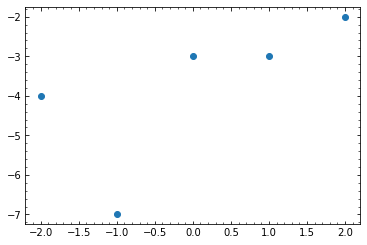

In [7]:
##Problem 2
x= np.arange(-2,3)
y=np.array([-4,-7,-3,-3,-2])
p,c=linear_leastsq(x,y)
chisq = np.sum(((y - f(x, *p)) )**2)
dof = len(y)- len(p)

Q = sf.gammaincc(0.5*dof, 0.5*chisq)
print(f"""True model :
chisq = {chisq}
dof = {dof}
reduce chisq = { chisq/dof}
goodness of fit = {Q}""")
plt.plot(x,y,"o")


In [6]:

#The x=-1 point is the outlier
x= np.array([-2,0,1,2])
y=np.array([-4,-3,-3,-2])
p,c=linear_leastsq(x,y)
chisq = np.sum(((y - f(x, *p)) )**2)
dof = len(y)- len(p)
Q = sf.gammaincc(0.5*dof, 0.5*chisq)
print(f"""True model :
chisq = {chisq}
dof = {dof}
reduce chisq = { chisq/dof}
goodness of fit = {Q}""")

True model :
chisq = 0.17142857142857157
dof = 2
reduce chisq = 0.08571428571428578
goodness of fit = 0.9178564384568925


## Problem 3 ##
Define the power series as the function g(x,a_k).
Take the derivative of $\chi^2$ with respect to $a_k$ and set it equal to zero so that the result, by the chain rule, is
$$0=\int^1_0 (g(x)-g(x,a)) dx \frac{d g(x,a)}{da_k} $$
Now consider the case where k=1:
$$0=\int^1_0 (g(x)-g(x,a)) dx  $$
$$ \int^1_0 (g(x))dx= \int^1_0 \sum^n_{i=0}a_ix^i $$
So $b = \int^1_0 (g(x)) $. Now consider n=2 and evaluate the right side:
$$ \int^1_0 \sum^2_{i=0}a_ix^i =a_0x+a_1\frac{x^2}{2}+a_2\frac{x^3}{3}$$
Pulling out all the $a_i$ terms and setting x=1 out we can see the first row of the Hilbert matrix $$
(1,\frac12,\frac13) $$

Know k=2:
Then
$$\frac{d g(x,a)}{da_2}=x $$
So all terms of the power  series will be multiblpu by x, so for n=2
$$ \int^1_0 \sum^2_{i=0}a_ix^i+1 =a_0\frac{x^2}{2}+a_1\frac{x^3}{3}+a_2\frac{x^4}{4}$$
We now have the second row of the matrix $$ (\frac12, \frac13,\frac14) $$ we can contine to expand for larger k and n to get a k by n Hilbert matrix

## Problem 3 ##
Define the power series as the function g(x,a_k).
Take the derivative of $\chi^2$ with respect to $a_k$ and set it equal to zero so that the result, by the chain rule, is
$$0=\int^1_0 (g(x)-g(x,a)) dx \frac{d g(x,a)}{da_k} $$
Now consider the case where k=1:
$$0=\int^1_0 (g(x)-g(x,a)) dx  $$
$$ \int^1_0 (g(x))dx= \int^1_0 \sum^n_{i=0}a_ix^i $$
So $b = \int^1_0 (g(x)) $. Now consider n=2 and evaluate the right side:
$$ \int^1_0 \sum^2_{i=0}a_ix^i =a_0x+a_1\frac{x^2}{2}+a_2\frac{x^3}{3}$$
Pulling out all the $a_i$ terms and setting x=1 out we can see the first row of the Hilbert matrix $$
(1,\frac12,\frac13) $$

Know k=2:
Then
$$\frac{d g(x,a)}{da_2}=x $$
So all terms of the power  series will be multiblpu by x, so for n=2
$$ \int^1_0 \sum^2_{i=0}a_ix^i+1 =a_0\frac{x^2}{2}+a_1\frac{x^3}{3}+a_2\frac{x^4}{4}$$
We now have the second row of the matrix $$ (\frac12, \frac13,\frac14) $$ we can contine to expand for larger k and n to get a k by n Hilbert matrix